In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2023-05-07 02:06:49.643580: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 02:06:49.678870: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 02:06:49.885211: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 02:06:49.886167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 02:06:51.037920: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
X_train = X_train/255
X_test = X_test/255

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

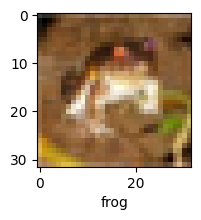

In [7]:
plot_sample(X_train, y_train, 0)

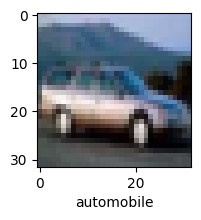

In [23]:
plot_sample(X_train, y_train, 4)

# Build a simple Artificial Nerual Network for classification

In [36]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 153s 97ms/step - loss: 1.8838 - accuracy: 0.3285
Epoch 2/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.6651 - accuracy: 0.4015
Epoch 3/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5837 - accuracy: 0.4317
Epoch 4/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.5259 - accuracy: 0.4536
Epoch 5/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.4842 - accuracy: 0.4654


In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.5310 - accuracy: 0.4571


[1.5309996604919434, 0.4571000039577484]

In [ ]:
# Using CNN for prediction of the images

In [9]:
cnn = models.Sequential([
    # Convolution Network
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Dense Network
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: nan - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: nan - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: nan - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: nan - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: nan - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: nan - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: nan - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: nan - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: nan - accuracy: 0.1000
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - loss: nan - accurac